# Phase 2, Experimentation with Semantic Domains

Semantic domain data is used courtesy of Renier de Blois and the United Bible Societies. A semantic domain contains nested, hierarchical labels for words in the Hebrew Bible such as:

> 0001001 beings - all living beings natural or supernatural

There are numerous levels of semantic data to choose from. We can implement this data for basis selection, to attempt to find more differentiations between verb classes. 

While the implementation of semantic domain data does not follow a strict form-to-function methodology, it is useful and interesting to see what the outcome of adding this data to the analysis will be. On the one hand, semantic domain data is hand-crafted and manually selected for fine-tuned semantic distinctions. On the other hand, these categories are legitimately interesting for verbal semantics. Classifying individual words is likely subject to less bias than classifying verb classes, due to the complexity of verbal arguments. Thus, this method at least follows the form-to-function methodology in an empirical way, i.e. using lower-level data to obtain empirically verifiable results for higher level data.

In [1]:
import numpy as np
import pandas as pd
import collections, os, sys, random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa

bhsa_data_paths=['~/github/etcbc/bhsa/tf/c',
                 '~/github/semantics/project_code/lingo/heads/tf/c',
                 '~/github/semantics/project_code/sdbh']

TF = Fabric(bhsa_data_paths)
tf_api = TF.load('''
                function lex vs language
                pdp freq_lex gloss domain ls
                heads prep_obj mother rela
                typ sp st 
                sem_domain 
                sem_domain_code
              ''', silent=True)

tf_api.makeAvailableIn(globals())
B = Bhsa(api=tf_api, name='phase2_semDomain', version='c')

from project_code.experiments2 import ExperimentFrame
from project_code.semspace import SemSpace
from project_code.sem_params import vf_sd_so

This is Text-Fabric 4.1.2
Api reference : https://dans-labs.github.io/text-fabric/Api/General/
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

118 features found and 0 ignored


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/Bhsa/" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/" title="text-fabric-api">Text-Fabric API 4.1.2</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/#search-templates" title="Search Templates Introduction and Reference">Search Reference</a>

## Experiment

In [2]:
sde = ExperimentFrame(vf_sd_so, tf=tf_api)

In [3]:
sde.data.shape

(53, 475)

In [4]:
sde.data

,<BD[.qal,<BR[.hif,<BR[.qal,<CQ[.qal,<FH[.nif,<FH[.qal,<LH[.hif,<LH[.nif,<LH[.qal,<LZ[.qal,...,ZBX[.piel,ZBX[.qal,ZKR[.hif,ZKR[.nif,ZKR[.qal,ZMM[.qal,ZMR[.piel,ZNH[.qal,ZR<[.qal,ZRQ[.qal
None,3.0,2.0,4.0,1.0,1.0,28.0,0.0,2.0,2.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
None|None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
None|None|None|None|None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
None|None|None|None|None|None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
None|None|animate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
None|None|animate|animate|animate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
None|None|inanimate|inanimate|inanimate|inanimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
None|animate,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
None|animate|animate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
None|animate|animate|animate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


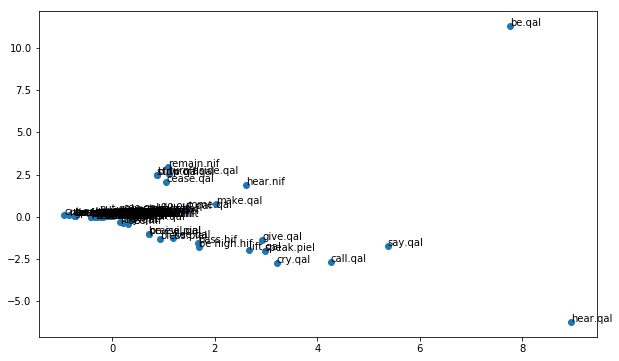

In [15]:
sds.pmi_plot.show()

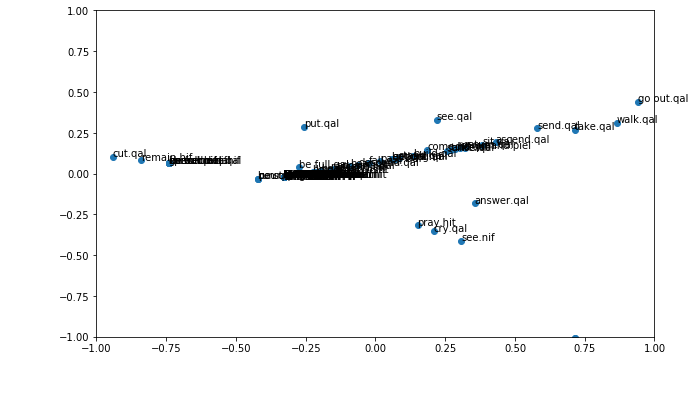

In [5]:
sds.pmi_plot.show(axis=[-1, 1, -1, 1])

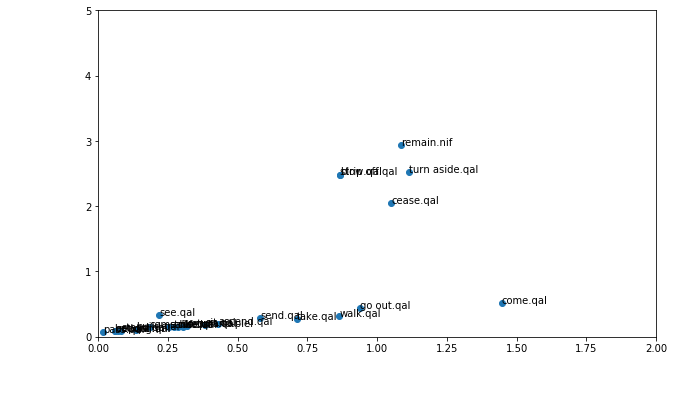

In [7]:
sds.pmi_plot.show(axis=[0, 2, 0, 5])

In [8]:
freq_sorted = sds.raw.sum().sort_values(ascending=False).head(200)

In [19]:
for lex in freq_sorted.index[:10]:
    key = f'{lex} ({sde.target2gloss[lex]})'
    print(sds.similarity_jaccard[key].sort_values(ascending=False).head(10))
    print()

NTN[.qal (give)      1.000000
NF>[.qal (lift)      1.000000
>MR[.qal (say)       1.000000
SPR[.piel (count)    0.666667
CWB[.hif (return)    0.666667
SBB[.hif (turn)      0.666667
R>H[.nif (see)       0.666667
NGD[.hif (report)    0.666667
CJT[.qal (put)       0.666667
PLL[.hit (pray)      0.666667
Name: >MR[.qal (say), dtype: float64

HJH[.qal (be)            1.000000
NBV[.hif (look at)       0.333333
CWB[.hif (return)        0.333333
SBB[.hif (turn)          0.333333
R>H[.nif (see)           0.333333
SPR[.piel (count)        0.333333
SWR[.qal (turn aside)    0.333333
NGD[.hif (report)        0.333333
TQ<[.qal (blow)          0.333333
JTR[.nif (remain)        0.333333
Name: HJH[.qal (be), dtype: float64

BW>[.qal (come)            1.0
ZRQ[.qal (toss)            0.5
KBD[.qal (be heavy)        0.5
JYB[.hit (stand)           0.5
JVB[.qal (be good)         0.5
JSP[.hif (add)             0.5
JRD[.qal (descend)         0.5
JRC[.qal (trample down)    0.5
JRC[.hif (trample down)    0.5
JR>[.q

In [22]:
sds.raw['JY>[.hif'].sort_values(ascending=False).head(10)

Pred                            69.0
Pred|Objc.inanimate              1.0
Pred|Cmpl.DRK/_inanimate         0.0
Pred|Adju.B_event                0.0
Pred|Adju.B_event|Cmpl.event     0.0
Pred|Adju.K_inanimate            0.0
Pred|Adju.event                  0.0
Pred|Adju.inanimate              0.0
Pred|Cmpl.<L_inanimate           0.0
Pred|Cmpl.>L_inanimate           0.0
Name: JY>[.hif, dtype: float64

In [23]:
sds.raw['JRD[.hif'].sort_values(ascending=False).head(10)

Pred                            17.0
Pred|Objc.inanimate              1.0
Pred|Cmpl.DRK/_inanimate         0.0
Pred|Adju.B_event                0.0
Pred|Adju.B_event|Cmpl.event     0.0
Pred|Adju.K_inanimate            0.0
Pred|Adju.event                  0.0
Pred|Adju.inanimate              0.0
Pred|Cmpl.<L_inanimate           0.0
Pred|Cmpl.>L_inanimate           0.0
Name: JRD[.hif, dtype: float64

In [24]:
search = '''

clause
    phrase function=Pred
        word lex=JY>[ vs=hif pdp=verb
'''

search = B.search(search)

181 results


In [28]:
B.prettySetup(features='sem_domain sem_domain_code')

B.show(search, )


##### Verse 1



##### Verse 2



##### Verse 3



##### Verse 4



##### Verse 5



##### Verse 6



##### Verse 7



##### Verse 8



##### Verse 9



##### Verse 10



##### Verse 11



##### Verse 12



##### Verse 13



##### Verse 14



##### Verse 15



##### Verse 16



##### Verse 17



##### Verse 18



##### Verse 19



##### Verse 20



##### Verse 21



##### Verse 22



##### Verse 23



##### Verse 24



##### Verse 25



##### Verse 26



##### Verse 27



##### Verse 28



##### Verse 29



##### Verse 30



##### Verse 31



##### Verse 32



##### Verse 33



##### Verse 34



##### Verse 35



##### Verse 36



##### Verse 37



##### Verse 38



##### Verse 39



##### Verse 40



##### Verse 41



##### Verse 42



##### Verse 43



##### Verse 44



##### Verse 45



##### Verse 46



##### Verse 47



##### Verse 48



##### Verse 49



##### Verse 50



##### Verse 51



##### Verse 52



##### Verse 53



##### Verse 54



##### Verse 55



##### Verse 56



##### Verse 57



##### Verse 58



##### Verse 59



##### Verse 60



##### Verse 61



##### Verse 62



##### Verse 63



##### Verse 64



##### Verse 65



##### Verse 66



##### Verse 67



##### Verse 68



##### Verse 69



##### Verse 70



##### Verse 71



##### Verse 72



##### Verse 73



##### Verse 74



##### Verse 75



##### Verse 76



##### Verse 77



##### Verse 78



##### Verse 79



##### Verse 80



##### Verse 81



##### Verse 82



##### Verse 83



##### Verse 84



##### Verse 85



##### Verse 86



##### Verse 87



##### Verse 88



##### Verse 89



##### Verse 90



##### Verse 91



##### Verse 92



##### Verse 93



##### Verse 94



##### Verse 95



##### Verse 96



##### Verse 97



##### Verse 98



##### Verse 99



##### Verse 100
